In [1]:
from models.unet import Unet
from models.diffusion_model import DiffusionModel
import copy
import torch
from utils.trainer_utils import Trainer
from utils.data_utils import load_config_from_yaml, plot_figure

In [2]:
# Loading the model and configurations and 
checkpoint = torch.load('checkpoints/checkpoint_1.pth.tar')
config = load_config_from_yaml("configs/config.yaml")

config_unet = config['model']
config_diffusion_model = config['diffusion']

# create instance of unet
unet_model = Unet(**config_unet)
unet_model.load_state_dict(checkpoint["unet_model_state"])

# create instance of ema mdoel
ema_model = (copy.deepcopy(unet_model).eval().requires_grad_(False))
ema_model.load_state_dict(checkpoint["ema_model_state"])

# create instance of DiffusionModel
diffusion_model = DiffusionModel(model=unet_model, **config_diffusion_model)
# folgendes war commented
diffusion_model.load_state_dict(checkpoint["diffusion_model_state"])

n_samples = 10
classes = torch.arange(0, 10).to("cpu") 

samples_ddim_eta0 = diffusion_model.sample(n_samples=n_samples, ema_model=None, classes=classes, cond_weight=1, use_ddim=False, eta=0)
samples_ema_ddim_eta0 = diffusion_model.sample(n_samples=n_samples, ema_model=ema_model, classes=classes, cond_weight=1, use_ddim=False, eta=0)


self.out_dim 1
dims [32, 32, 64, 64]
final 32 1 Conv2d(32, 1, kernel_size=(1, 1), stride=(1, 1))
DDPM Sample Guided


Sampling Time Step:: 1000it [23:14,  1.39s/it]


DDPM Sample Guided


Sampling Time Step:: 1000it [17:58,  1.08s/it]


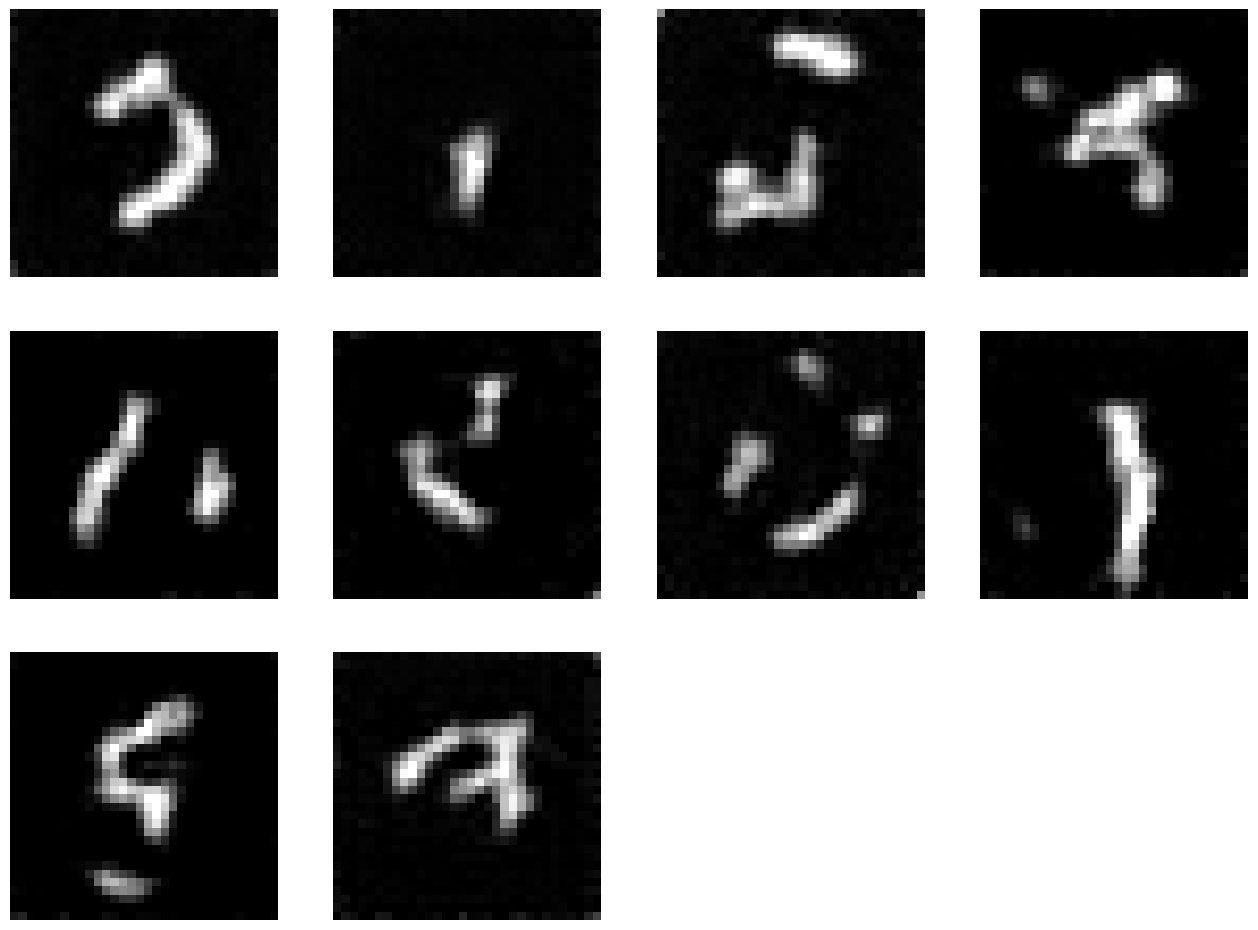

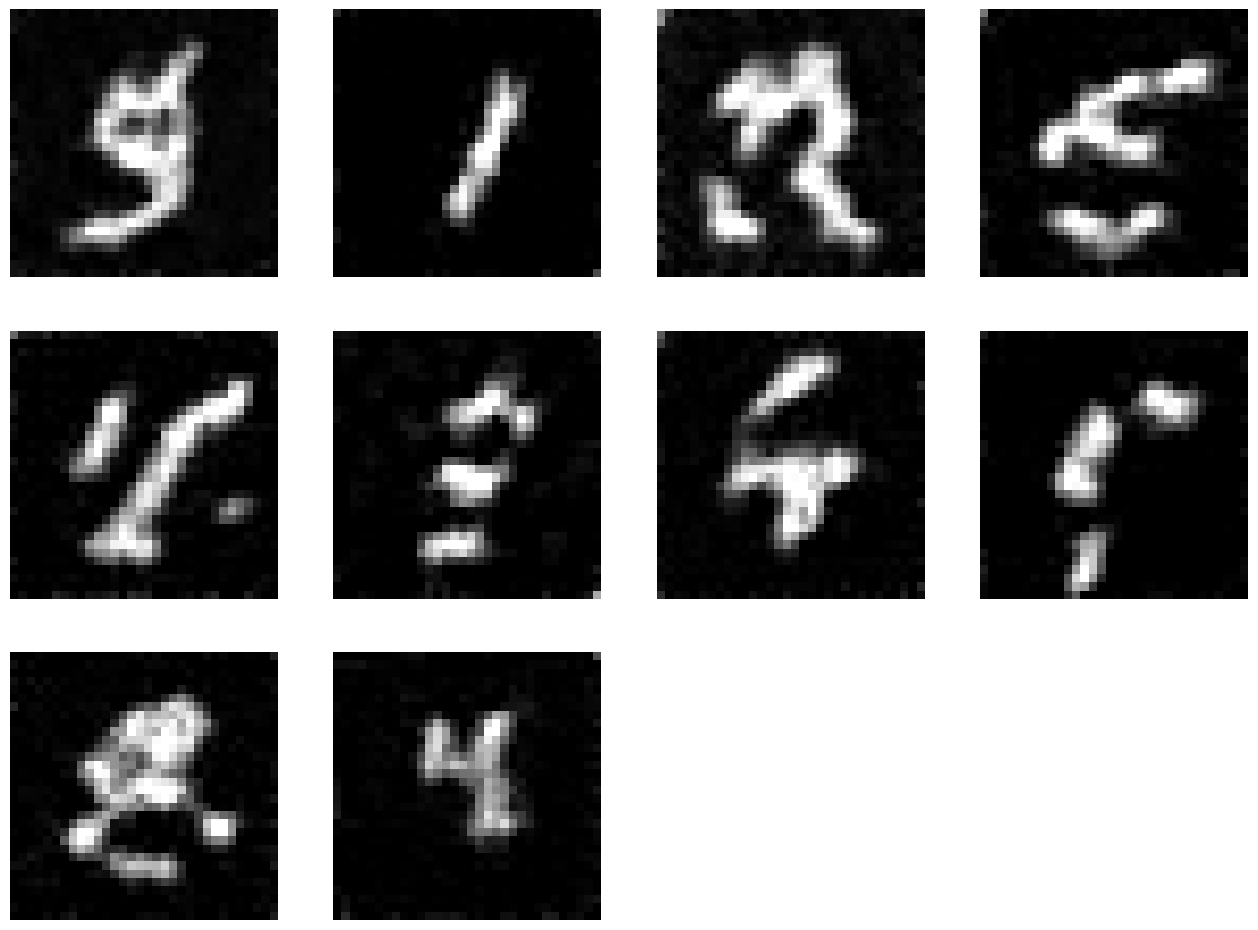

In [3]:
fig_eta0 = plot_figure(samples_ddim_eta0, n_samples)
fig_ema_eta0 = plot_figure(samples_ema_ddim_eta0, n_samples)

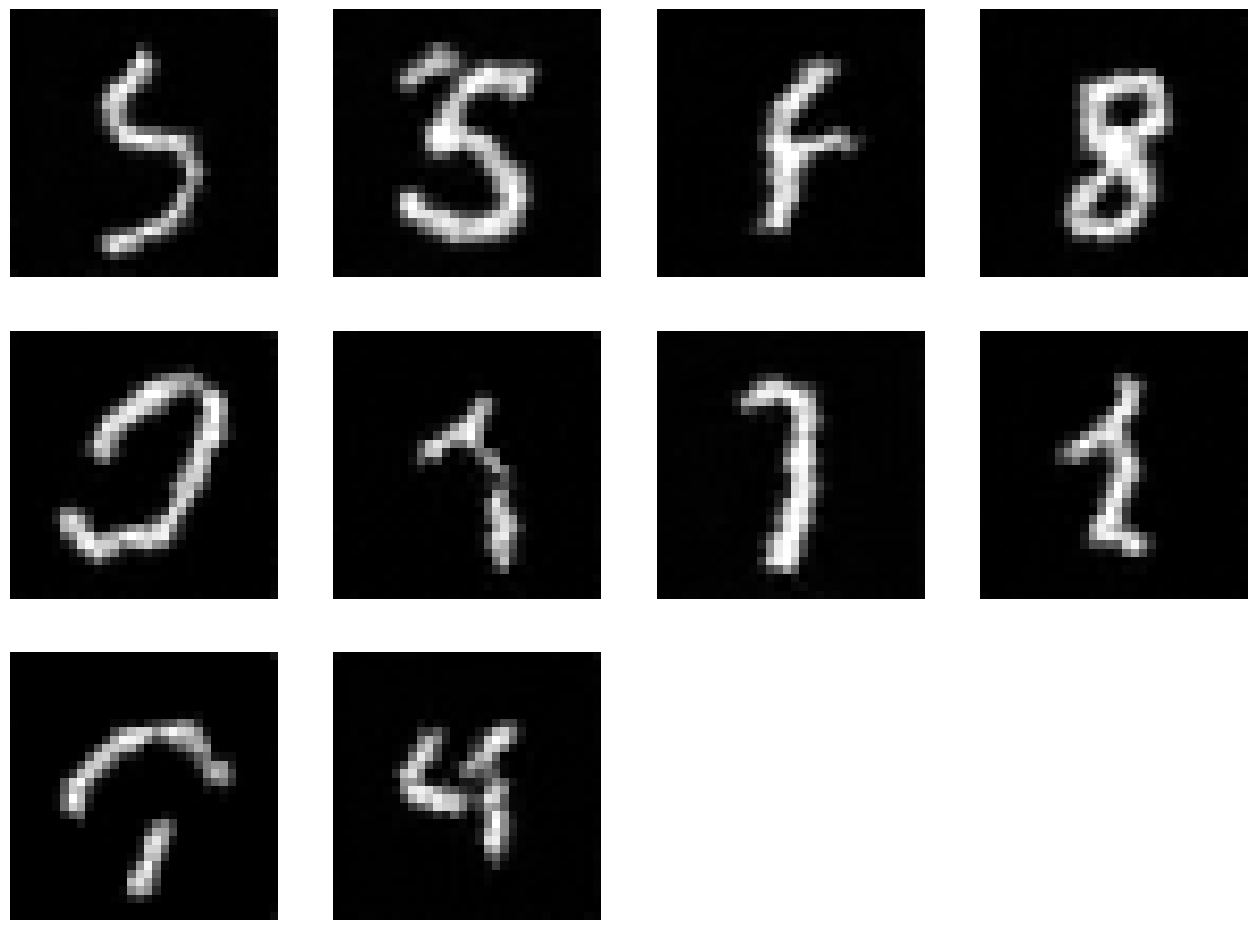

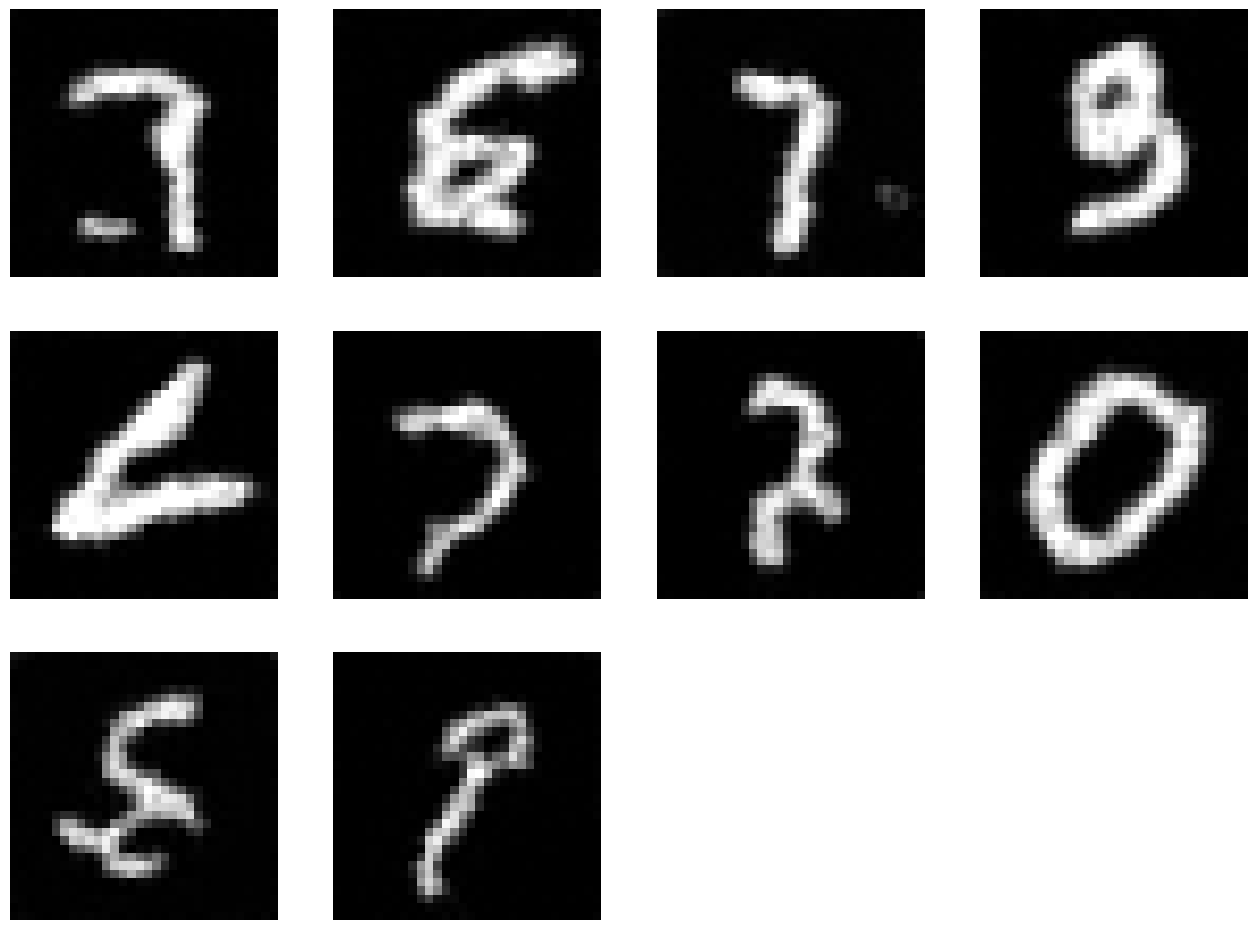

In [4]:
fig = plot_figure(samples_ddim, n_samples)
fig_ema = plot_figure(samples_ema_ddim, n_samples)

In [4]:
print(checkpoint['epoch'])

2


In [5]:
# train again
optimizer = torch.optim.Adam(unet_model.parameters(), lr=config['optimizer']['lr'])
optimizer.load_state_dict(checkpoint["optimizer_state"])
trainer = Trainer(**config['trainer'], diffusion_model=diffusion_model, optimizer=optimizer)
trainer.nb_epochs = 4
trainer.start_epoch = checkpoint['epoch']
trainer.train_loop()


Epoch: 3


Training Loop:   4%|▍         | 39/938 [04:56<1:54:05,  7.61s/it]


KeyboardInterrupt: 

In [ ]:
# train model from beginning with same configurations: to reproduce results
# makes no use of existing states
config = load_config_from_yaml("configs/config.yaml")

config_unet = config['model']
config_diffusion_model = config['diffusion']

unet_model = Unet(**config_unet)
diffusion_model = DiffusionModel(model=unet_model, **config_diffusion_model)

optimizer = torch.optim.Adam(unet_model.parameters(), lr=config['optimizer']['lr'])
trainer = Trainer(**config['trainer'], diffusion_model=diffusion_model, optimizer=optimizer)
trainer.train_loop()